In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
'''King County DataFrame that Includes logs of various variables '''
kc_data_full = pd.read_csv('kc_house_data.csv')
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].replace("?",0)
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].astype(float)
kc_data_full['zipcode'] = kc_data_full['zipcode'].astype(str)

kc_data_full = kc_data_full[~np.isnan(kc_data_full['waterfront'])]
kc_data_full = kc_data_full[~np.isnan(kc_data_full['view'])]

kc_data_full = kc_data_full.drop(['id','yr_renovated','lat','long'], axis=1)

kc_data_full.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [6]:
kc_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 17 columns):
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
zipcode          19164 non-null object
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(6), int64(9), object(2)
memory usage: 2.6+ MB


In [7]:
kc_train = pd.read_csv('kc_house_data.csv')

kc_train['sqft_basement'] = kc_train['sqft_basement'].replace("?",0)
kc_train['sqft_basement'] = kc_train['sqft_basement'].astype(float)
kc_train['zipcode'] = kc_train['zipcode'].astype(str)

kc_train = kc_train[~np.isnan(kc_train['waterfront'])]
kc_train = kc_train[~np.isnan(kc_train['view'])]

kc_train = kc_train.drop(['id','yr_renovated','lat','long'], axis=1)

kc_train['price'] = np.log(kc_train['price'])
log_sqft_living = np.log(kc_train['sqft_living'])
log_bedrooms = np.log(kc_train['bedrooms'])
log_bathrooms = np.log(kc_train['bathrooms'])
log_yr_built = np.log(kc_train['yr_built'])
log_grade = np.log(kc_train['grade'])

Text(0.5, 1.0, 'Multi-Collinearity of Features')

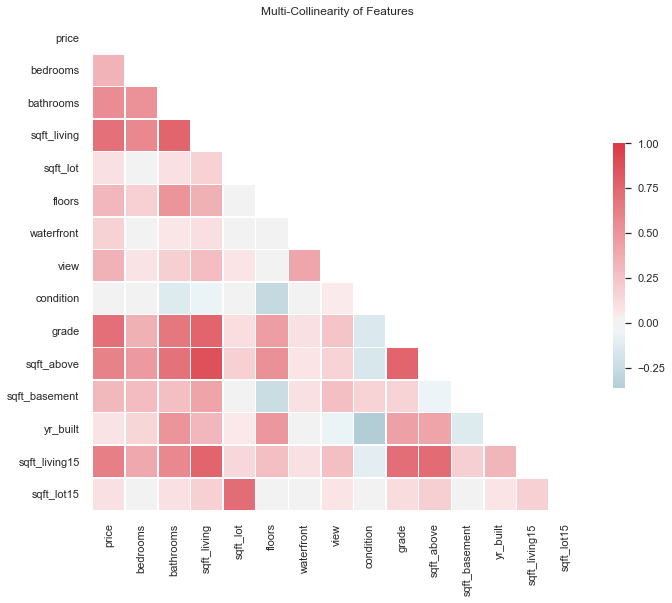

In [8]:
sns.set(style="white")

# Create a covariance matrix
corr = kc_train.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')

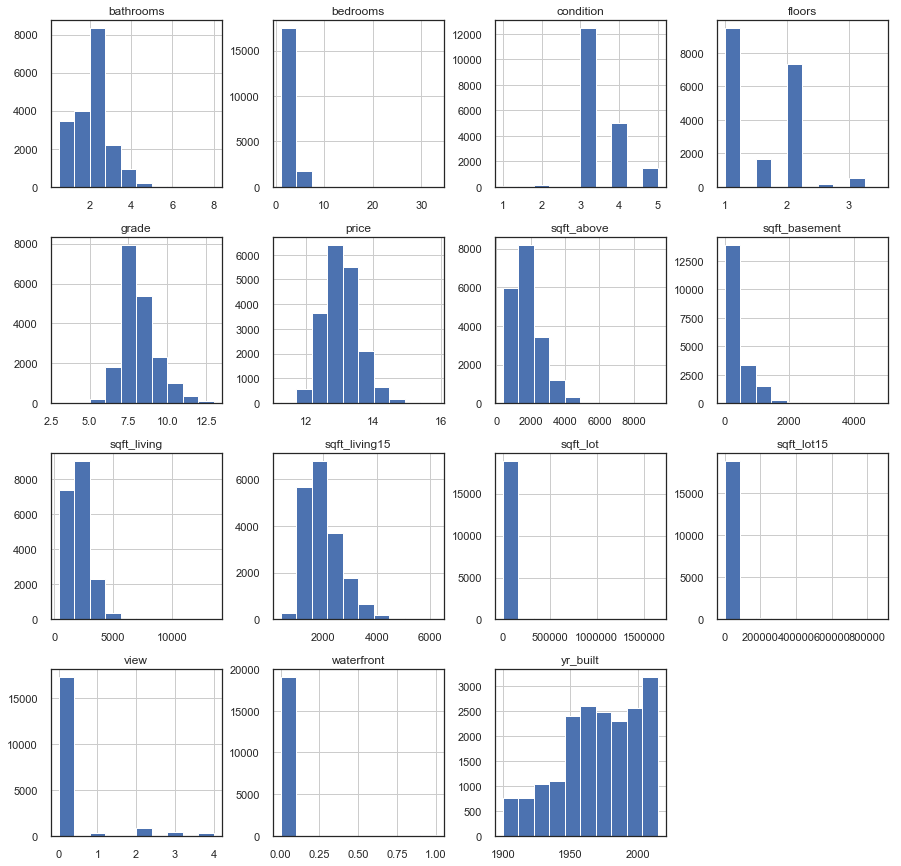

In [9]:
_=kc_train.hist(figsize=(15,15))

In [10]:
f = 'price~log_bedrooms'

model1 = ols(formula=f, data=kc_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2572.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:58:03   Log-Likelihood:                -13716.
No. Observations:               19164   AIC:                         2.744e+04
Df Residuals:                   19162   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.2951      0.015    803.709   

In [11]:
model1.params

Intercept       12.295132
log_bedrooms     0.640269
dtype: float64

In [12]:
np.exp(0.836) # = price?

2.3071200151265554

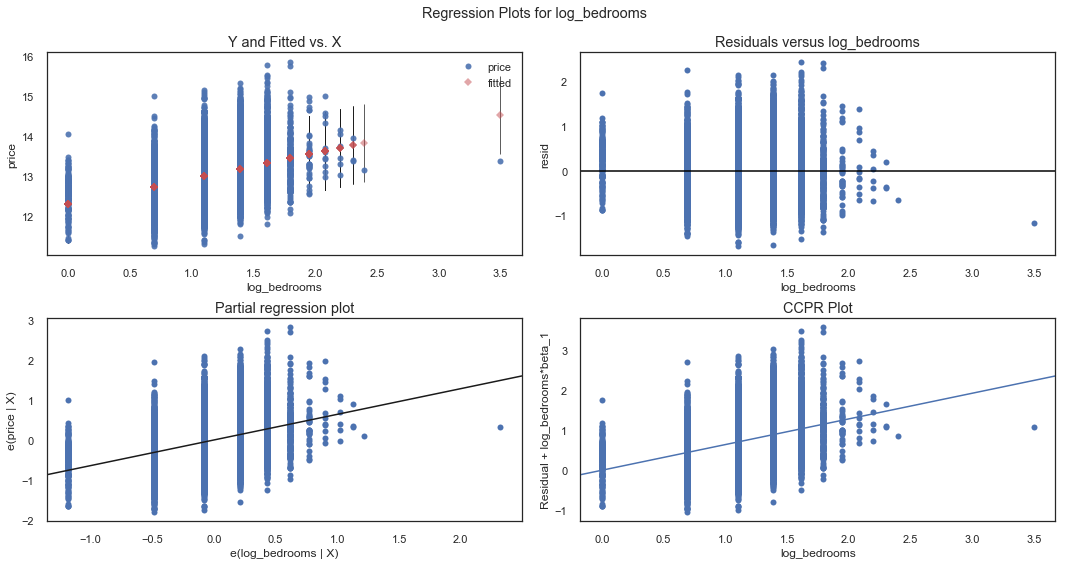

In [13]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model1,'log_bedrooms', fig=fig)
plt.savefig('log_bedrooms.png')

In [14]:
f = 'price~bedrooms'

model2 = ols(formula=f, data=kc_data_full).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2024.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:            -2.7198e+05
No. Observations:               19164   AIC:                         5.440e+05
Df Residuals:                   19162   BIC:                         5.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.249e+05   9603.499     13.009      0.0

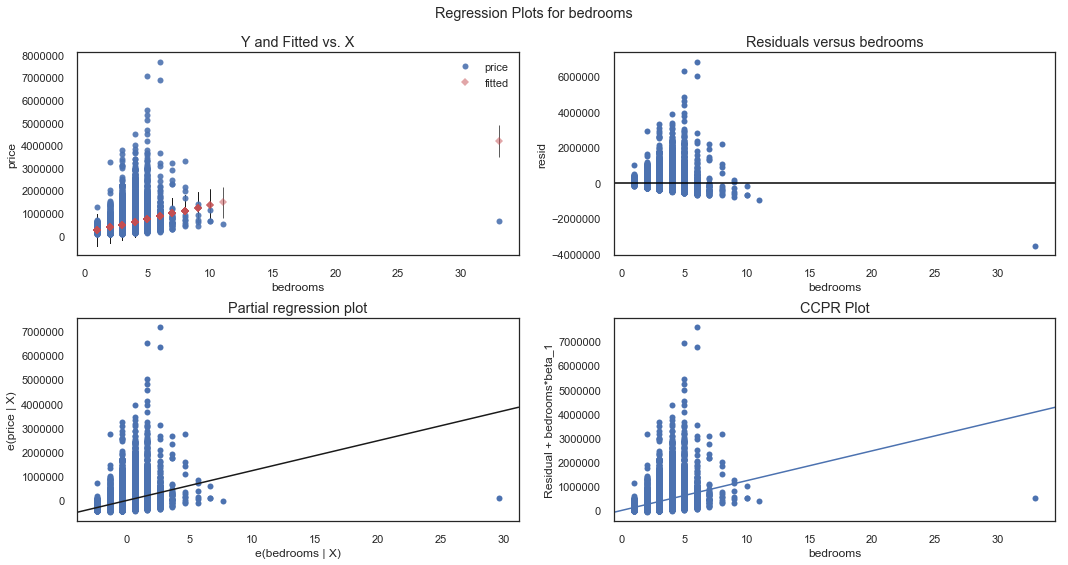

In [15]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model2, 'bedrooms', fig=fig)
plt.savefig('bedrooms.png')

In [16]:
def models(df, feature_cols):
    '''This is a function that outputs the Intercept, Coefficients, 3 types of Errors, and R-Squared'''
    X = kc_train[feature_cols]
    y = kc_train['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print(f'Intercept of the regression line:',round(linreg.intercept_,4))
    print(f'Coefficients:',linreg.coef_)
    print('\n')
    
    y_pred = linreg.predict(X_test)

    
    print(f'Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))
    print(f'Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),4))
    print(f'Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
    print(f'R-Squared:',round(linreg.score(X,y),4))
    print('\n')
    
    print(f'Mean Absolute Error exp:', round(np.exp(metrics.mean_absolute_error(y_test, y_pred)),4))
    print(f'Mean Squared Error exp:', round(np.exp(metrics.mean_squared_error(y_test, y_pred)),4))

In [17]:
models(df=kc_train, feature_cols=['sqft_living'])

Intercept of the regression line: 12.2211
Coefficients: [0.0003967]


Mean Absolute Error: 0.3066
Mean Squared Error: 0.1412
Root Mean Squared Error: 0.3757
R-Squared: 0.4851


Mean Absolute Error exp: 1.3588
Mean Squared Error exp: 1.1516


In [18]:
models(df=kc_train, feature_cols=['sqft_living','bedrooms','bathrooms'])

Intercept of the regression line: 12.2803
Coefficients: [ 0.00038904 -0.045986    0.05282406]


Mean Absolute Error: 0.3052
Mean Squared Error: 0.1411
Root Mean Squared Error: 0.3756
R-Squared: 0.4925


Mean Absolute Error exp: 1.3569
Mean Squared Error exp: 1.1515


In [19]:
models(df=kc_train, feature_cols=['sqft_living15','sqft_lot15','grade'])

Intercept of the regression line: 10.845
Coefficients: [ 1.76032158e-04 -3.69773168e-07  2.43223310e-01]


Mean Absolute Error: 0.2925
Mean Squared Error: 0.1321
Root Mean Squared Error: 0.3635
R-Squared: 0.5234


Mean Absolute Error exp: 1.3398
Mean Squared Error exp: 1.1412


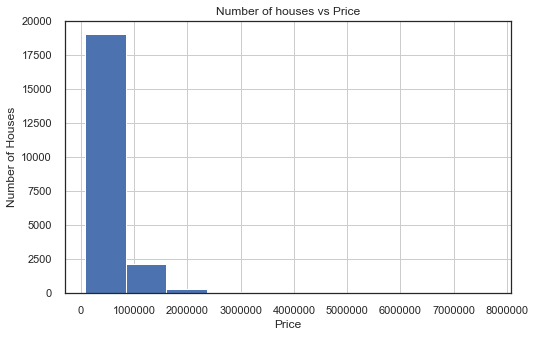

In [20]:
_=df.hist('price',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.savefig('price1.png')

In [21]:
df['price_log'] = np.log(df['price'])
df['price_log'].head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price_log, dtype: float64

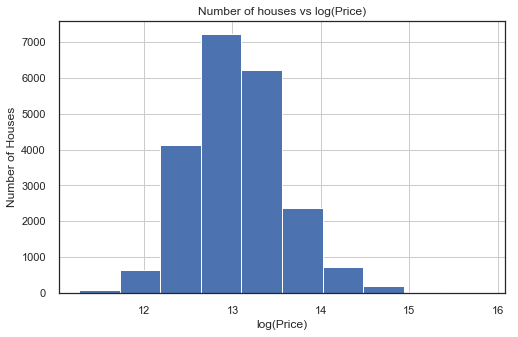

In [22]:
_=df.hist('price_log',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")
plt.savefig('log_price_hist2.png')